In [139]:
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import seaborn as sns
import datetime
import bs4

In [120]:
spec_chars = string.punctuation + '\n\xa0«»\t—…–'

def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

def join_all_titles(data):
    res = ''
    for i in range(len(data)):
        row = data.iloc[i]
        if type(row['title']) != str:
            continue
        res += '\n' + row['title']
    return res

def compute_frequent_words(data):
    text = join_all_titles(data)
    text = remove_chars_from_text(text, spec_chars)
    tokens = word_tokenize(text)
    freq_dict = FreqDist(nltk.Text([token.strip() for token in tokens if token not in russian_stopwords]))
    return freq_dict

In [145]:
data = pd.read_csv('./vc_posts.csv')
# filter out rows with empty title
data = data[(data['title'].notnull()) & (data['is_advertisement'] == False)]
data['tags'] = data['tags'].apply(eval)
data['tags_count'] = data['tags'].apply(len)
data['title_len'] = data['title'].apply(len)
data['content_len'] = data['content'].apply(len)
data['date'] = data['date'].apply(datetime.datetime.strptime, args=('%a, %d %b %Y %H:%M:%S %z',))
data['days_since_post'] = data['date'].apply(lambda x: (datetime.datetime.now(datetime.timezone.utc) - x).days)
data['images_count'] = data['content'].apply(lambda x: x.count('<img'))
data.head()

,_id,author_name,author_type,comments,content,createdAt,date,favorites,hits,id,...,subsite_label,tags,title,url,views,tags_count,title_len,content_len,days_since_post,images_count
0,6616c4acd2ad343afb59d936,Успешный провал,self,2,"<div class=""l-island-a"">\n \n <p>Отк...",2024-04-10T16:56:12.412Z,2024-04-09 18:42:14+03:00,0,372,1118037,...,life,[],Как потерять бизнес за три месяца,https://vc.ru/life/1118037-kak-poteryat-biznes...,2644,0,33,17238,1,1
1,6616c4acd2ad343afb59d935,Realm Digital,self,2,"<figure class=""figure-image"">\n <style>\n ...",2024-04-10T16:56:12.060Z,2024-04-08 17:01:57+03:00,1,64,1115687,...,life,[],Зачем Вашему Бизнесу Профессиональный Веб-Сайт?,https://vc.ru/life/1115687-zachem-vashemu-bizn...,790,0,47,7480,2,1
2,6616c4abd2ad343afb59d934,Таня Боброва,editor,102,"<div class=""l-island-a"">\n \n <p>Ком...",2024-04-10T16:56:11.889Z,2024-04-09 13:19:04+03:00,9,4649,1117264,...,money,"[новости, ozon, отчётности]",Отчёт Ozon за год: выручка выросла на 53% — до...,https://vc.ru/money/1117264-otchet-ozon-za-god...,16068,3,141,4870,1,0
3,6616c4abd2ad343afb59d933,Pyrobyte,self,17,"<div class=""l-island-a"">\n \n <p>При...",2024-04-10T16:56:11.606Z,2024-04-09 07:47:32+03:00,31,903,1110527,...,transport,[],8 лучших сервисов для автоматизации транспортн...,https://vc.ru/transport/1110527-8-luchshih-ser...,10583,0,70,50264,1,2
4,6616c4abd2ad343afb59d932,Timur Taepov,self,0,"<div class=""l-island-a"">\n \n <p>Это...",2024-04-10T16:56:11.119Z,2024-04-09 19:28:03+03:00,2,47,1118101,...,chatgpt,[],Как создать AI-продукт новичку? Базовые поняти...,https://vc.ru/chatgpt/1118101-kak-sozdat-ai-pr...,501,0,61,7340,1,0


In [146]:
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['это'])

In [134]:
compute_frequent_words(data).most_common(20)

[('Статьи', 4418),
 ('России', 610),
 ('Как', 535),
 ('млн', 525),
 ('редакцииКак', 518),
 ('рублей', 430),
 ('которые', 368),
 ('сервис', 337),
 ('компании', 335),
 ('года', 316),
 ('бизнес', 276),
 ('помощью', 271),
 ('2023', 266),
 ('млрд', 263),
 ('бизнеса', 262),
 ('изза', 260),
 ('почему', 258),
 ('1', 250),
 ('деньги', 246),
 ('Google', 240)]

In [135]:
compute_frequent_words(data[data['views'] > 10_000]).most_common(20)

[('Статьи', 220),
 ('года', 35),
 ('России', 34),
 ('2023', 33),
 ('рублей', 32),
 ('редакцииКак', 27),
 ('млн', 24),
 ('которые', 18),
 ('10', 17),
 ('году', 16),
 ('тысяч', 16),
 ('Как', 15),
 ('млрд', 14),
 ('2024', 13),
 ('компании', 12),
 ('Telegram', 12),
 ('бизнес', 11),
 ('коротко', 11),
 ('1', 11),
 ('редакцииДень', 11)]

# Correlation matrix

In [147]:
cormat = data[['views', 'tags_count', 'favorites', 'likes', 'comments', 'hits', 'title_len', 'content_len', 'images_count', 'days_since_post']].corr()
cormat

,views,tags_count,favorites,likes,comments,hits,title_len,content_len,images_count,days_since_post
views,1.000000,0.009889,0.030058,0.134470,0.282145,0.010243,0.080177,0.058783,-0.042740,-0.180402
tags_count,0.009889,1.000000,0.016304,0.082803,0.126015,0.072138,0.214828,-0.007054,0.066729,0.098814
favorites,0.030058,0.016304,1.000000,0.604590,0.267797,0.481472,0.091523,0.334574,0.151672,0.269059
likes,0.134470,0.082803,0.604590,1.000000,0.591520,0.617801,0.205058,0.241475,0.162056,0.316150
comments,0.282145,0.126015,0.267797,0.591520,1.000000,0.322686,0.291362,0.053800,0.075068,0.145999
hits,0.010243,0.072138,0.481472,0.617801,0.322686,1.000000,0.120958,0.187575,0.112420,0.240920
title_len,0.080177,0.214828,0.091523,0.205058,0.291362,0.120958,1.000000,0.054561,0.114014,0.264269
content_len,0.058783,-0.007054,0.334574,0.241475,0.053800,0.187575,0.054561,1.000000,0.229771,0.171725
images_count,-0.042740,0.066729,0.151672,0.162056,0.075068,0.112420,0.114014,0.229771,1.000000,0.378419
days_since_post,-0.180402,0.098814,0.269059,0.316150,0.145999,0.240920,0.264269,0.171725,0.378419,1.000000


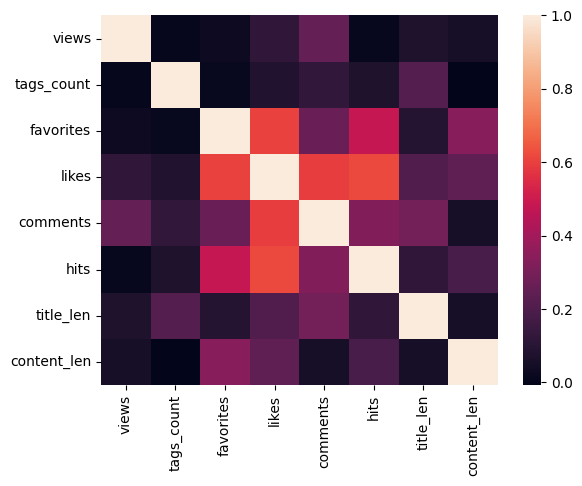

In [114]:
sns.heatmap(cormat);

## Conclusions:
- VC promotes posts with more likes and comments (likes & comments are more correlated with hits than views)
- There is correlation between content length and likes + favorites
- There is a weak correlation between title length and likes + comments

Text(0, 0.5, 'Tags count')

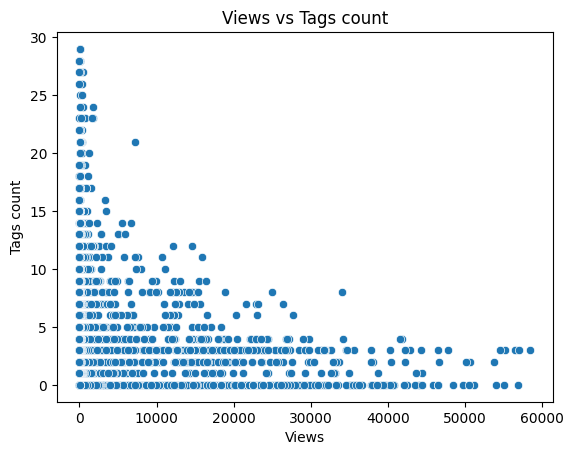

In [109]:
non_outliers = data[(data['views'] < 60_000) & (data['tags_count'] < 30)]
ax = sns.scatterplot(x="views", y="tags_count", data=non_outliers)
ax.set_title('Views vs Tags count')
ax.set_xlabel('Views')
ax.set_ylabel('Tags count')

Text(0, 0.5, 'Tags count')

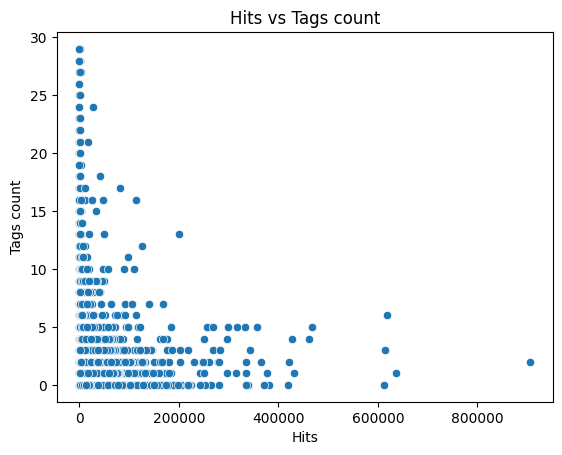

In [110]:
non_outliers = data[(data['hits'] < 1_000_000) & (data['tags_count'] < 30)]
ax = sns.scatterplot(x="hits", y="tags_count", data=non_outliers)
ax.set_title('Hits vs Tags count')
ax.set_xlabel('Hits')
ax.set_ylabel('Tags count')

Text(0, 0.5, 'Title length')

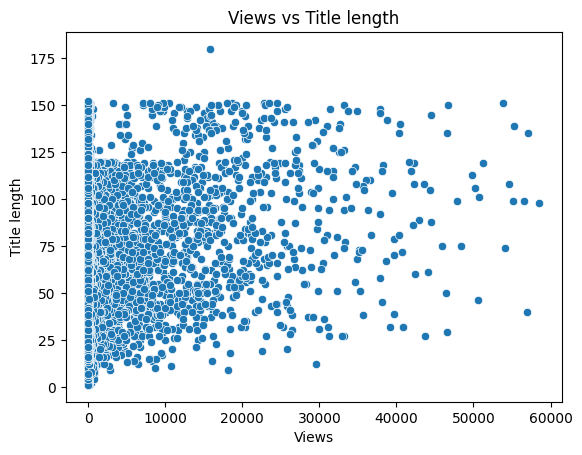

In [111]:
non_outliers = data[(data['views'] < 60_000)]
ax = sns.scatterplot(x="views", y="title_len", data=non_outliers)
ax.set_title('Views vs Title length')
ax.set_xlabel('Views')
ax.set_ylabel('Title length')

Text(0, 0.5, 'Title length')

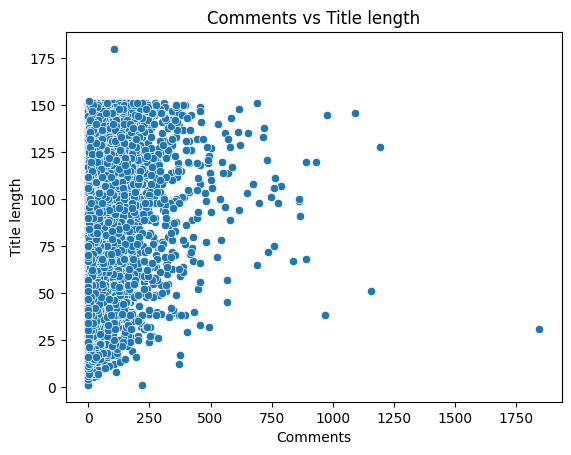

In [112]:
non_outliers = data
ax = sns.scatterplot(x="comments", y="title_len", data=non_outliers)
ax.set_title('Comments vs Title length')
ax.set_xlabel('Comments')
ax.set_ylabel('Title length')

Text(0, 0.5, 'Views')

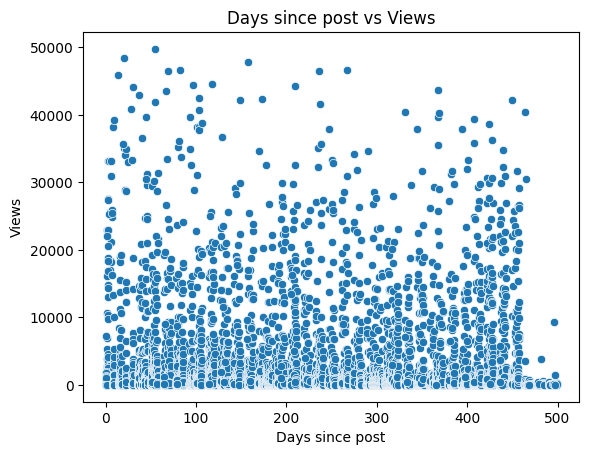

In [154]:
non_outliers = data[(data['views'] < 50_000) & (data['days_since_post'] < 500)]
ax = sns.scatterplot(x="days_since_post", y="views", data=non_outliers)
ax.set_title('Days since post vs Views')
ax.set_xlabel('Days since post')
ax.set_ylabel('Views')

Text(0, 0.5, 'Content length')

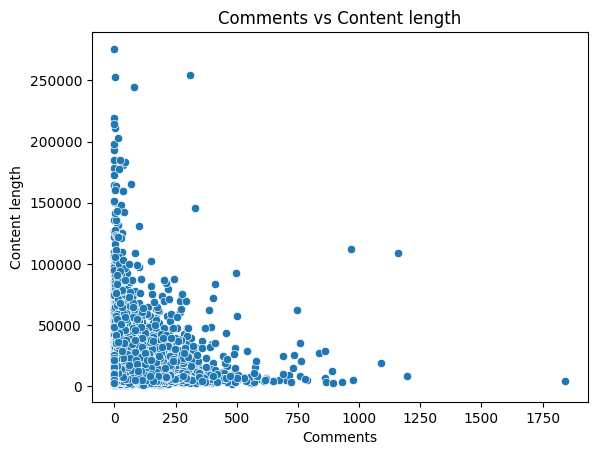

In [157]:
non_outliers = data
ax = sns.scatterplot(x="comments", y="content_len", data=non_outliers)
ax.set_title('Comments vs Content length')
ax.set_xlabel('Comments')
ax.set_ylabel('Content length')

Text(0, 0.5, 'Content length')

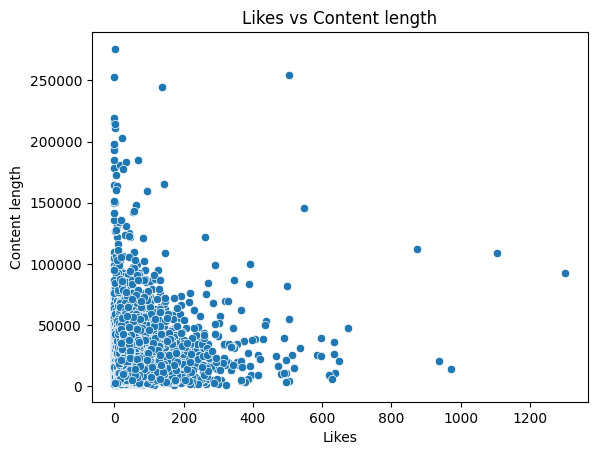

In [159]:
non_outliers = data
ax = sns.scatterplot(x="likes", y="content_len", data=non_outliers)
ax.set_title('Likes vs Content length')
ax.set_xlabel('Likes')
ax.set_ylabel('Content length')